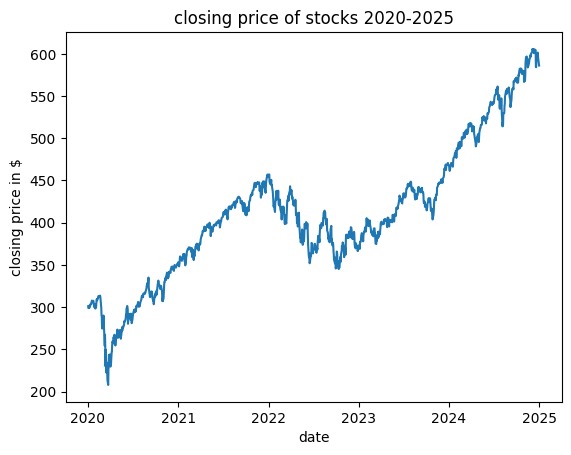

In [147]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/rhettoria/-market-risk-analytics-/refs/heads/main/dataset/risk_data.csv') # reading the csv file previously created, trick : go finder and copy the exact path to this file so he can be used 

df.head() #classic function to see the first rows

# works ✅

df = pd.read_csv('https://raw.githubusercontent.com/rhettoria/-market-risk-analytics-/refs/heads/main/dataset/risk_data.csv', skiprows=2) #first two rows are not really useful so we might just skip them

df.head()

df.columns = ['date', 'close', 'high', 'low', 'open', 'volume'] #just renaming to adjust after the change

df.head()

# looks good ✅ 

#optional : changing dates as a string (text) into actual date objects to make fruther plotting easier

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True) #i changed the column date to be the index so we can later arrange by date

df.head()

# ✅


plt.plot(df['close']) #as we previously set date as the index, plot has become indeed easing, we use mainly this one over other columns to avoid in day volatility

plt.title('closing price of stocks 2020-2025')
plt.xlabel('date')
plt.ylabel('closing price in $')

#plt.plot(df['high'])
#plt.plot(df['low'])
#plt.plot(df['open'])
#plt.plot(df['volume'])

plt.savefig("close_price_5years.png")

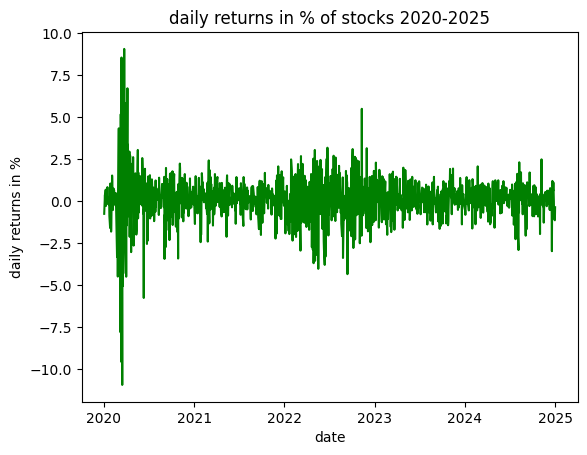

In [191]:
#CALCULATING DAILY RETURNS



df['daily return'] = ((df['close'] - df['close'].shift(1)) / df['close'].shift(1))*100 #shift is pandas shifting all values of 1 row at once : much faster than a simple loop
plt.plot(df['daily return'], color = 'green')


plt.title('daily returns in % of stocks 2020-2025')
plt.xlabel('date')
plt.ylabel('daily returns in %')

plt.savefig("daily_returns_in%_5years.png")

#really messy, lets shorten period to a trading year to see more clear

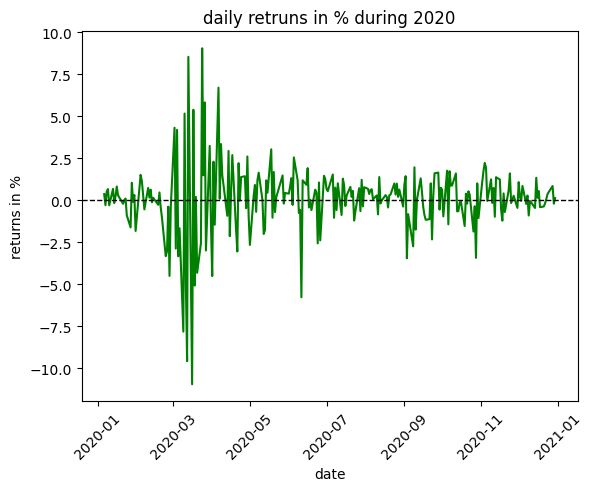

In [193]:

#(df_date_1year = df[1:252])
#(plt.plot(df_date_1year['close']))


#(df_date_1year['daily return'] = (df_date_1year['close'] - df_date_1year['close'].shift(1) / df_date_1year['close'].shift(1)))
#(plt.plot(df_date_1year['daily return'], color = 'green'))

#(panda complains abt SettingWithCopyWarning -> using copy + loc to fix this, loc is for accessing df using columns label)

df_date_1year = df[1:252].copy()

df_date_1year.loc[:, 'daily return'] = 100*((df_date_1year['close'] - df_date_1year['close'].shift(1)) / df_date_1year['close'].shift(1))
plt.plot(df_date_1year['daily return'], color = 'green')
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1) #the line at 0% to see the gains and loses more clearly

#no more error ! (that was optional)

plt.title('daily retruns in % during 2020')
plt.xlabel('date')
plt.ylabel('returns in %')
plt.xticks(rotation=45) #the dates were too close it was unreadable, i rotated them 45°

plt.savefig("retruns_in_%_1year")



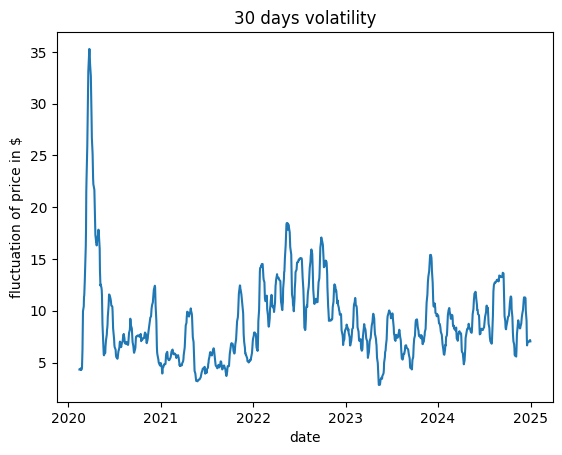

In [129]:
#volatility

volatility = df['daily return'].std() #volatility as the standard variation : how much it moves day to day

df['volatility'] = df['daily return'].rolling(30).std() #rolling as moving the window and calculate the volatility over 30days

plt.plot(df['volatility'])




#as we see, the big spike in 2020 was probably the covid's economic repercussions, and moving forward, it seems pretty stable 


plt.title('30 days volatility')
plt.xlabel('date')
plt.ylabel('fluctuation of price in $')

plt.savefig("30_days_volatility.png")

In [107]:
#last mesure : vaR is the worst gain(?) expected with a % confidence, ex : 95% chance of not losing more than 2.5% (5%/2)


vaR_975 = df['daily return'].quantile(0.025)
vaR_95 = df['daily return'].quantile(0.05) #
vaR_90 = df['daily return'].quantile(0.1)
vaR_50 = df['daily return'].quantile(0.5)

print(vaR_975)
print(vaR_95)
print(vaR_90)
print(vaR_50)


# ex: 5% of the time, daily returns are worse than 281, 
# 10% of cases, returns are worse than 303 ect... 
#so we can confidentially say that it was a good idea to invest 5 years ago, our initial capital would have pretty much doubled with 95% certainty 



262.7903625488281
281.9603759765625
303.4922180175781
403.1134643554687
